In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('../../dataset/The_Cancer_data_1500_V2.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
pd.DataFrame(df.isna().sum()).T.style.background_gradient(cmap='rainbow')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

In [5]:
col_category = [col for col in X.columns if X[col].nunique() / df.shape[0] < 0.01]
col_numeric = [col for col in X.columns if col not in col_category]

col_target = "Diagnosis"

# <u>**EXPLORATORY DATA ANALYSIS (EDA)**</u>

## <u>**Univariat Plot**</u>

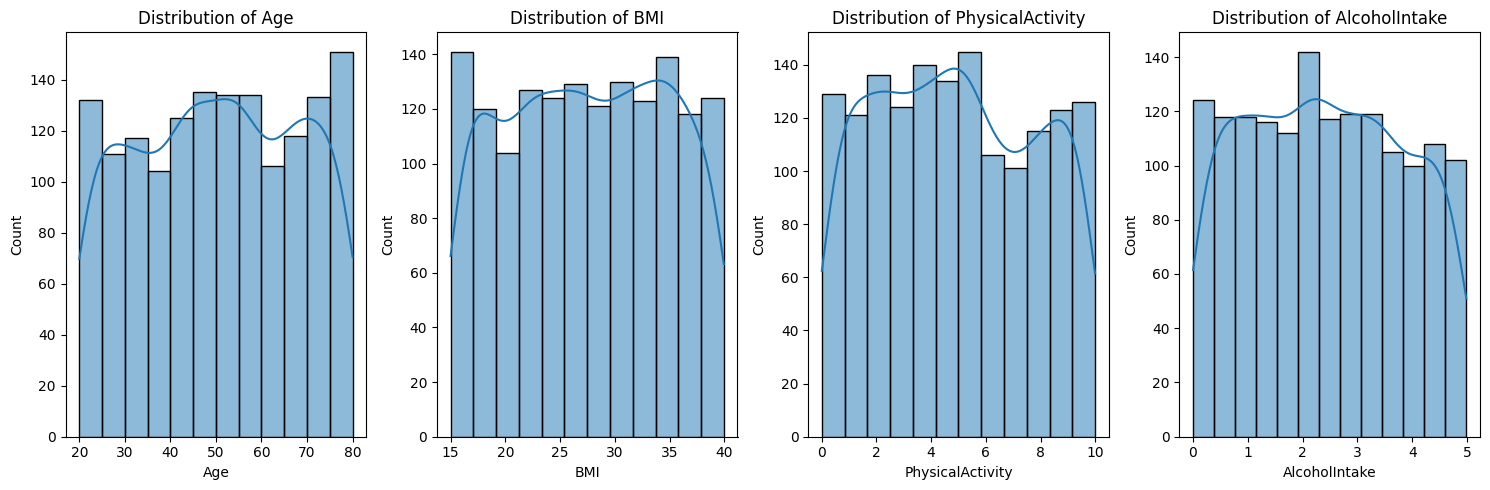

In [9]:
def numeric_univariat_plot(df, col_numeric):
    n_cols = 4
    n_rows = (len(col_numeric) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, numeric in enumerate(col_numeric):
        plt.subplot(n_rows, n_cols, index + 1)
        sns.histplot(df[numeric], kde=True)
        plt.title(f"Distribution of {numeric}")
        plt.xlabel(numeric)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


numeric_univariat_plot(df, col_numeric)

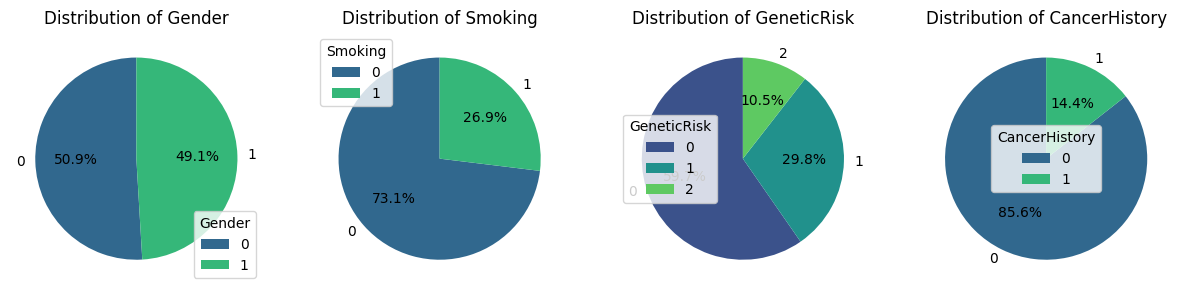

In [15]:
def category_univariat_plot(df, col_category):
    n_cols = 4
    n_rows = (len(col_category) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, category in enumerate(col_category):
        plt.subplot(n_rows, n_cols, index + 1)
        # sns.countplot(x=category, data=df)
        data = df[category].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(data)))
        plt.legend(title=category)
        plt.title(f"Distribution of {category}")

    plt.tight_layout
    plt.show()

category_univariat_plot(df, col_category)

## <u>**Summary Univariat Plot**</u>

In these univariate plots, it can be concluded that the distribution of data in the Age and BMI columns tends to be uniform with some fluctuations. For the PhysicalActivity column, most of the population has a low level of physical activity, with a significant decrease observed beyond an index of 6. The AlcoholIntake column shows that higher alcohol consumption (index 3 and above) is less common among the population.

In the categorical univariate plots, the gender distribution shows an almost even split between women and men. A majority of the population, 73.1%, are non-smokers. For GeneticRisk, the largest portion of the population is at low genetic risk, with a small fraction at high risk. Regarding cancer history, 85.6% of the population has no history of cancer, while 14.4% do.

## <u>**Bivariat Plot**</u>

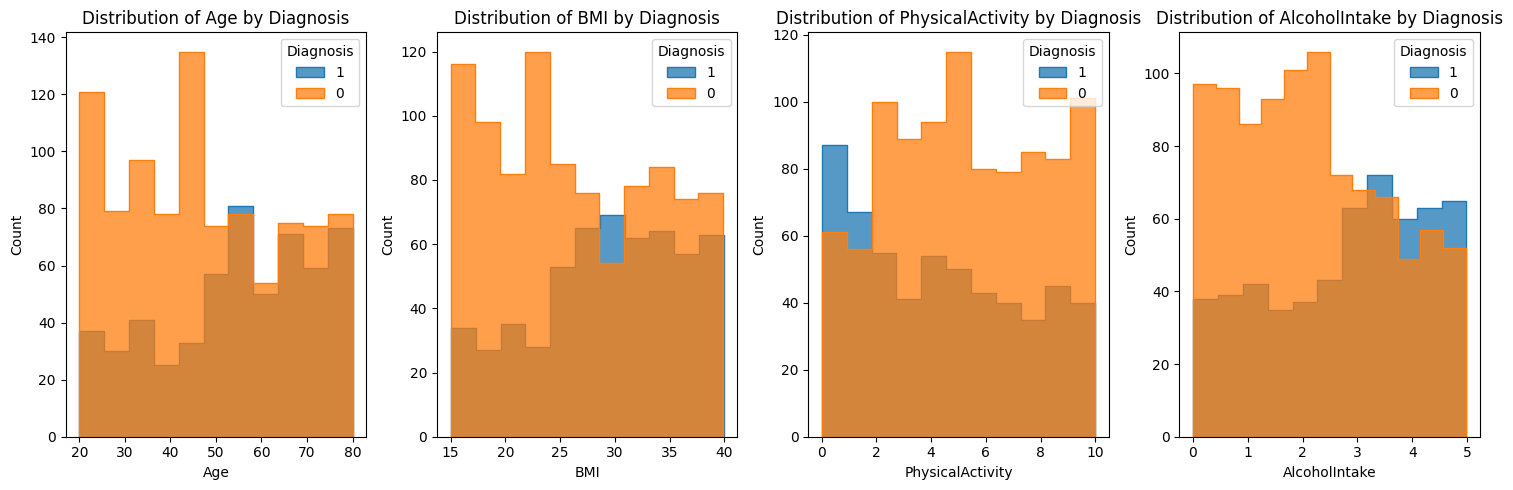

In [16]:
def numeric_bivariat_plot(df, col_numeric, col_target):
    n_cols = 4
    n_rows = (len(col_numeric) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, numeric in enumerate(col_numeric):
        plt.subplot(n_rows, n_cols, index + 1)
        for label in df[col_target].unique():
            sns.histplot(df[df[col_target] == label][numeric], kde=False, label=str(label), element='step')
        plt.title(f"Distribution of {numeric} by {col_target}")
        plt.xlabel(numeric)
        plt.ylabel("Count")
        plt.legend(title=col_target)

    plt.tight_layout()
    plt.show()

numeric_bivariat_plot(df, col_numeric, col_target)

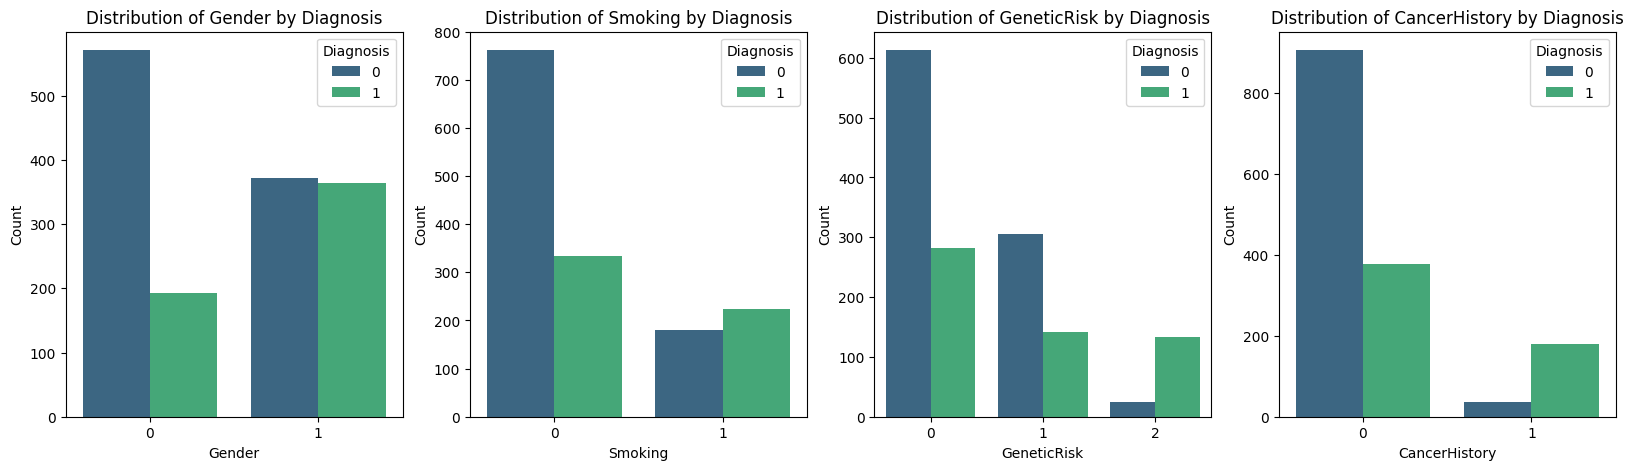

In [21]:
def category_bivariat_plot(df, col_category, col_target):
    n_cols = 4
    n_rows = (len(col_category) + 1) // n_cols

    plt.figure(figsize=(20, 5 * n_rows))
    
    for index, category in enumerate(col_category):
        plt.subplot(n_rows, n_cols, index + 1)
        sns.countplot(x=category, hue=col_target, data=df, palette='viridis')
        plt.title(f"Distribution of {category} by {col_target}")
        plt.xlabel(category)
        plt.ylabel("Count")
        plt.legend(title=col_target)

    plt.tight_layout
    plt.show()

category_bivariat_plot(df, col_category, col_target)

## <u>**Summary Bivariat Plot**</u>
In these plots, it is observed that the population under 50 years old has a relatively low cancer diagnosis rate, which increases for ages above 50. Similarly, for BMI, the diagnosis rate is low for indices under 25 and starts to rise for indices above 25. In contrast, cancer diagnosis rates are high among those with minimal physical activity and decrease as physical activity levels increase. Those diagnosed with cancer tend to consume more alcohol compared to those not diagnosed.

In these plots, it is evident that the prevalence of cancer is higher among women than men, with nearly half of the female population diagnosed with cancer. Similarly, smokers have a higher proportion of cancer diagnoses compared to non-smokers, with over half of the smoking population diagnosed with cancer. Regarding genetic risk, the majority of individuals with high genetic risk tend to be diagnosed with cancer. Similarly, more than half of the individuals with a history of cancer are also diagnosed with cancer.

## <u>**Multivariat Plot**</u>

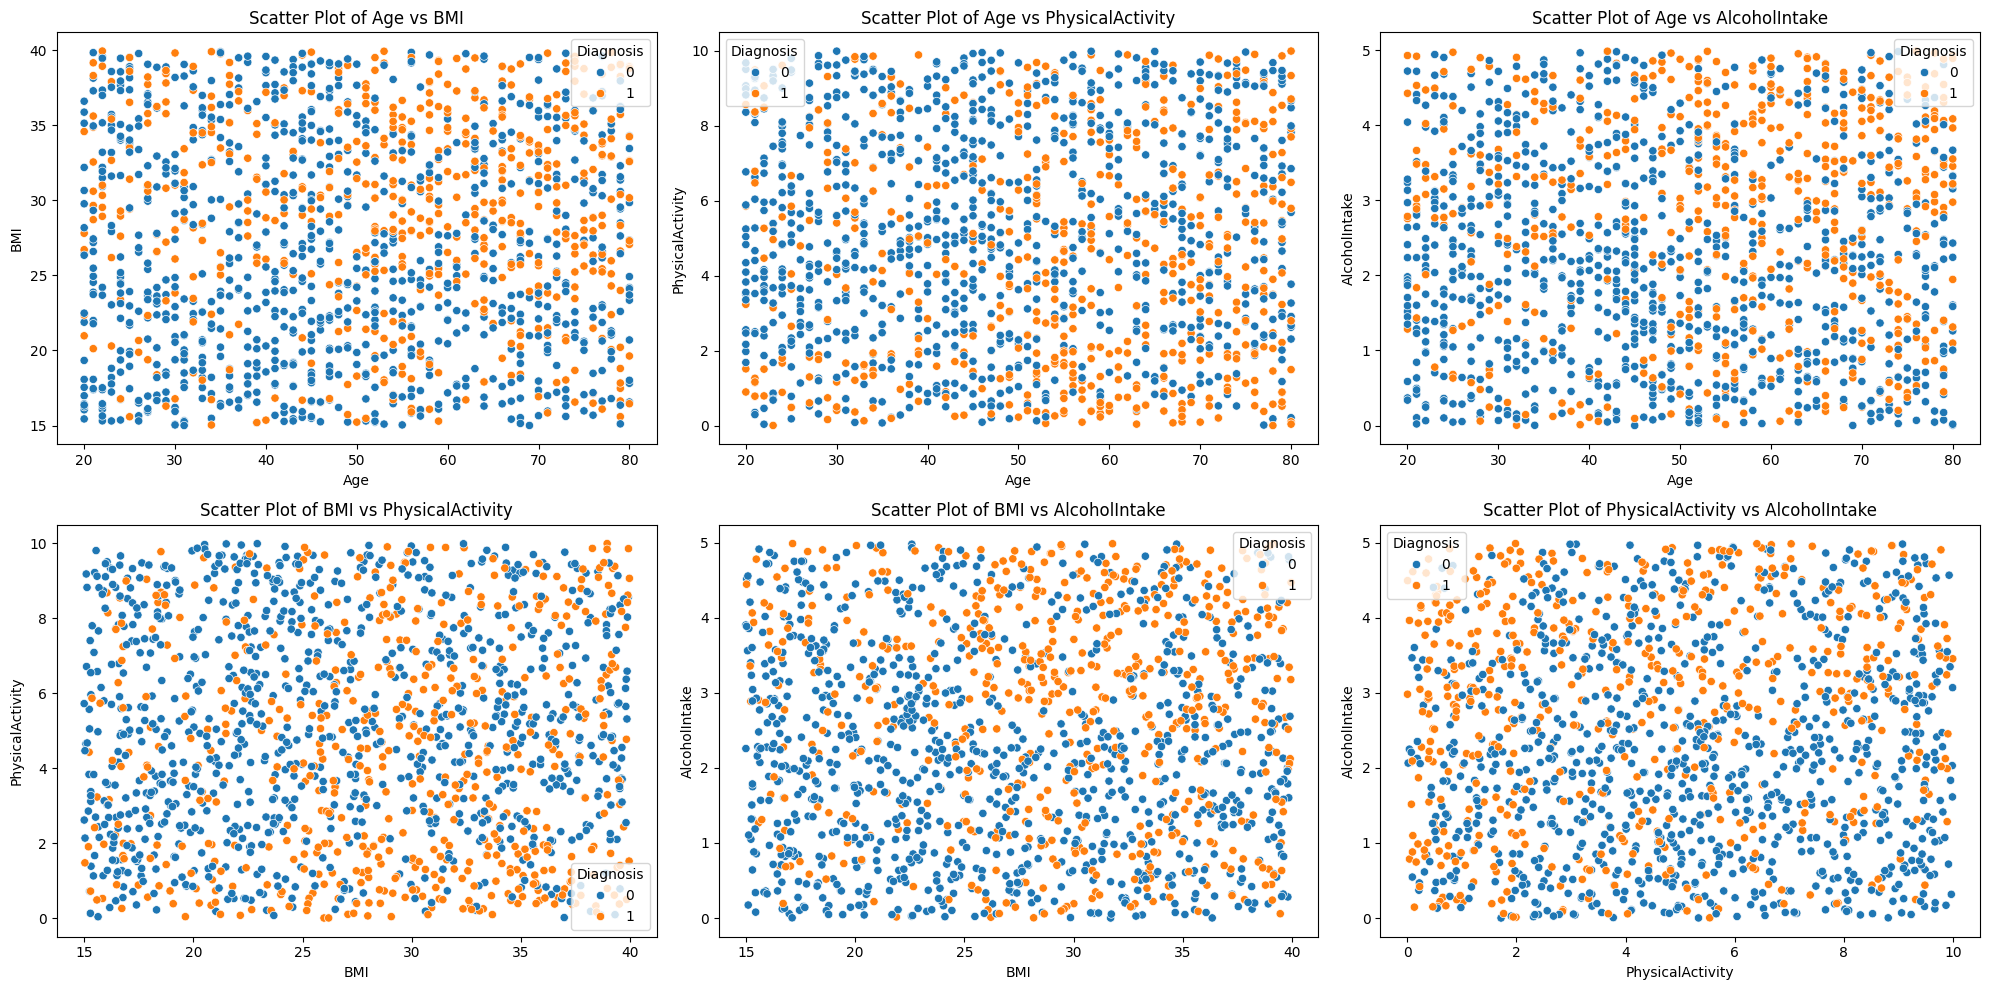

In [24]:
def num_multivariat_plot(df, col_numeric, col_target):
    n_cols = 3
    n_pairs = len(col_numeric) * (len(col_numeric) - 1) // 2
    n_rows = (n_pairs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    if n_rows == 1:
        axes = [axes]

    pair_index = 0
    for index_1, num_1 in enumerate(col_numeric):
        for index_2, num_2 in enumerate(col_numeric):
            if index_1 < index_2:
                ax = axes[pair_index]
                sns.scatterplot(data=df, x=num_1, y=num_2, hue=col_target, ax=ax)
                ax.set_title(f"Scatter Plot of {num_1} vs {num_2}")
                ax.set_xlabel(num_1)
                ax.set_ylabel(num_2)
                ax.legend(title=col_target)
                pair_index += 1


    # Disable unused subplot
    for i in range(pair_index, n_rows * n_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    

num_multivariat_plot(df, col_numeric, col_target)

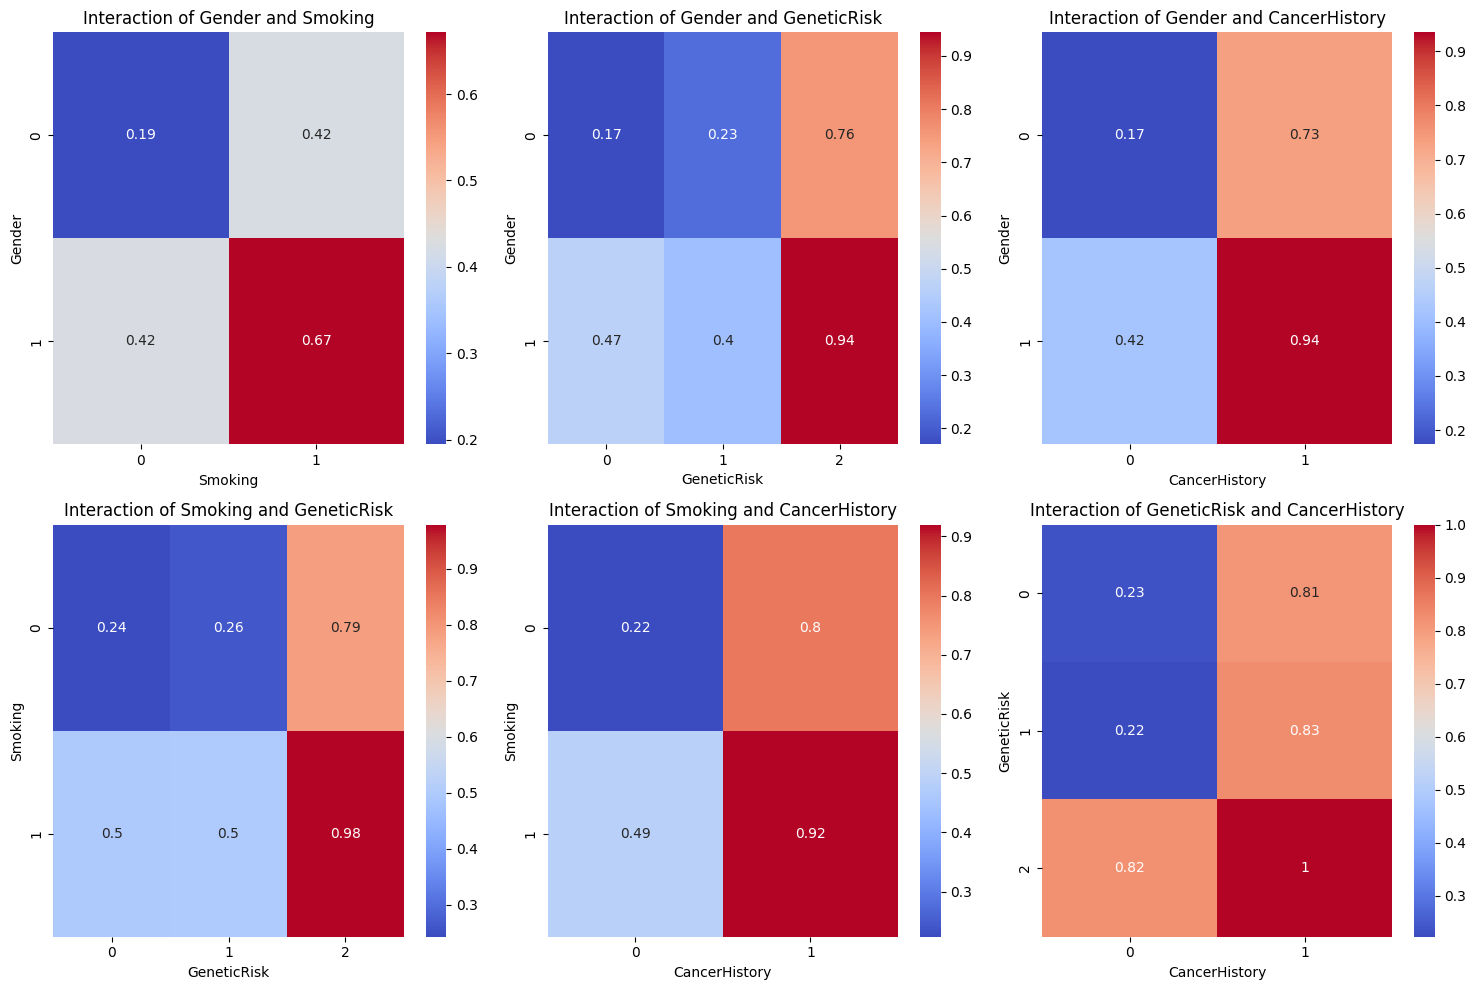

In [27]:
def cat_multivariat_plot(df, col_category, col_target):
    n_cols = 3
    n_pairs = len(col_category) * (len(col_category) - 1) // 2
    n_rows = (n_pairs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    pair_index = 0
    for index_1, cat_1 in enumerate(col_category):
        for index_2, cat_2 in enumerate(col_category):
            if index_1 < index_2:
                ax = axes[pair_index]
                cross_tab = pd.crosstab(df[cat_1], df[cat_2], values=df[col_target], aggfunc='mean')
                sns.heatmap(cross_tab, annot=True, cmap="coolwarm", ax=ax)
                ax.set_title(f"Interaction of {cat_1} and {cat_2}")
                ax.set_xlabel(cat_2)
                ax.set_ylabel(cat_1)
                pair_index += 1

    for i in range(pair_index, n_rows * n_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


cat_multivariat_plot(df, col_category, col_target)

## <u>**Summary Multivariat Plot**</u>

From the scatter plot analysis of variables such as age, BMI, physical activity, and alcohol consumption in relation to the Diagnosis, it can be observed that there is no clear and consistent relationship between these variables and the diagnosis of cancer. The spread of the data shows wide variations, indicating that complex interactions among variables might play a role in cancer diagnosis. However, some trends do emerge, such as increased alcohol consumption in patients diagnosed with cancer, although there is no clear dependence on age, BMI, or level of physical activit

From the analysis of the heatmap interactions between demographic variables and history with cancer diagnosis, it appears that gender, genetic factors, and cancer history play a significant role in the outcome of cancer diagnosis. For example, women, individuals with high genetic risk, and those with a history of cancer show a higher tendency to be diagnosed with cancer. On the other hand, the relationship between smoking and cancer diagnosis seems less clear, with relatively lower interactions compared to other variables in influencing the diagnosis.
y.

# <u>**MACHINE LEARNING - PREDICTION**</u>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 8), (300, 8), (1200,), (300,))

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from skopt.space import Real, Integer

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("poly", PolynomialFeatures(degree=2)),
    ("scale", StandardScaler()),
])

category_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ("numeric", numeric_pipe, col_numeric),
    ("encoder", category_pipe, col_category),
])

In [30]:
models = {
    "SVM": SVC(),
    "RandForest": RandomForestClassifier(),
    "KNeigbbours": KNeighborsClassifier(),
    "LogReg": LogisticRegression(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LGBM": LGBMClassifier(),
}

scores = {}

In [31]:
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model),
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {scores[name]:.3f}")

SVM accuracy: 0.870
RandForest accuracy: 0.947
KNeigbbours accuracy: 0.790
LogReg accuracy: 0.887
XGB accuracy: 0.940
CatBoost accuracy: 0.967
[LightGBM] [Info] Number of positive: 446, number of negative: 754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371667 -> initscore=-0.525073
[LightGBM] [Info] Start training from score -0.525073
LGBM accuracy: 0.930


In [46]:
from skopt import BayesSearchCV

param_grid = {
    "depth": np.arange(5, 10, 1),
    "learning_rate": np.arange(0.01, 0.3, 0.01),
    "iterations": np.arange(100, 1000, 100),
    "l2_leaf_reg": np.arange(10, 50, 10),
}

catboost_model = CatBoostClassifier(verbose=0, loss_function='Logloss')

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=10, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 5220 candidates, totalling 52200 fits


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025549BAA7D0>,
             param_grid={'depth': array([5, 6, 7, 8, 9]),
                         'iterations': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'l2_leaf_reg': array([10, 20, 30, 40]),
                         'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])},
             verbose=1)

In [49]:
print(f"Best parameter: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameter: {'depth': 9, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.14}
Best score: 0.9483333333333333


In [50]:
y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classifcation Report\n {classification_report(y_test, y_pred)}")

Accuracy on Test Set: 0.9733333333333334

Confusion Matrix:
 [[188   1]
 [  7 104]]

Classifcation Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       189
           1       0.99      0.94      0.96       111

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



# <u>**SUMMARY MACHINE LEARNING - PREDICTION**</u>


During the model selection process for this dataset, several algorithms were tested, with CatBoost standing out due to its impressive initial accuracy of 0.96. During further training, there was a decrease in accuracy to 0.948, which might suggest potential overfitting. However, this concern was dispelled by the excellent evaluation results on the test data. From the testing, the CatBoost model demonstrated an exceptional accuracy rate of 0.973. Further details from the confusion matrix revealed that the model accurately predicted 188 negative cases and 104 positive cases, with only 1 false positive and 7 false negatives. The classification report supports these findings, with high precision and recall for both classes, reflecting the model's robust performance. This evaluation indicates that despite the accuracy decrease during training, the CatBoost model has successfully generalized well from the training data to the testing data, demonstrating its capability in overcoming overfitting challenges and maintaining high accuracy under real testing conditions.